In [3]:
import pandas as pd

detectors = ["SHITOMASI", "HARRIS", "FAST", "BRISK", "ORB", "AKAZE", "SIFT"];
descriptors = ["BRISK", "BRIEF", "FREAK", "AKAZE", "SIFT", "ORB" ];
data = pd.read_csv('ttc_stats.csv')
data['image_ttc'] = data['image_ttc'].apply(lambda x: x if x > 0 else -1)

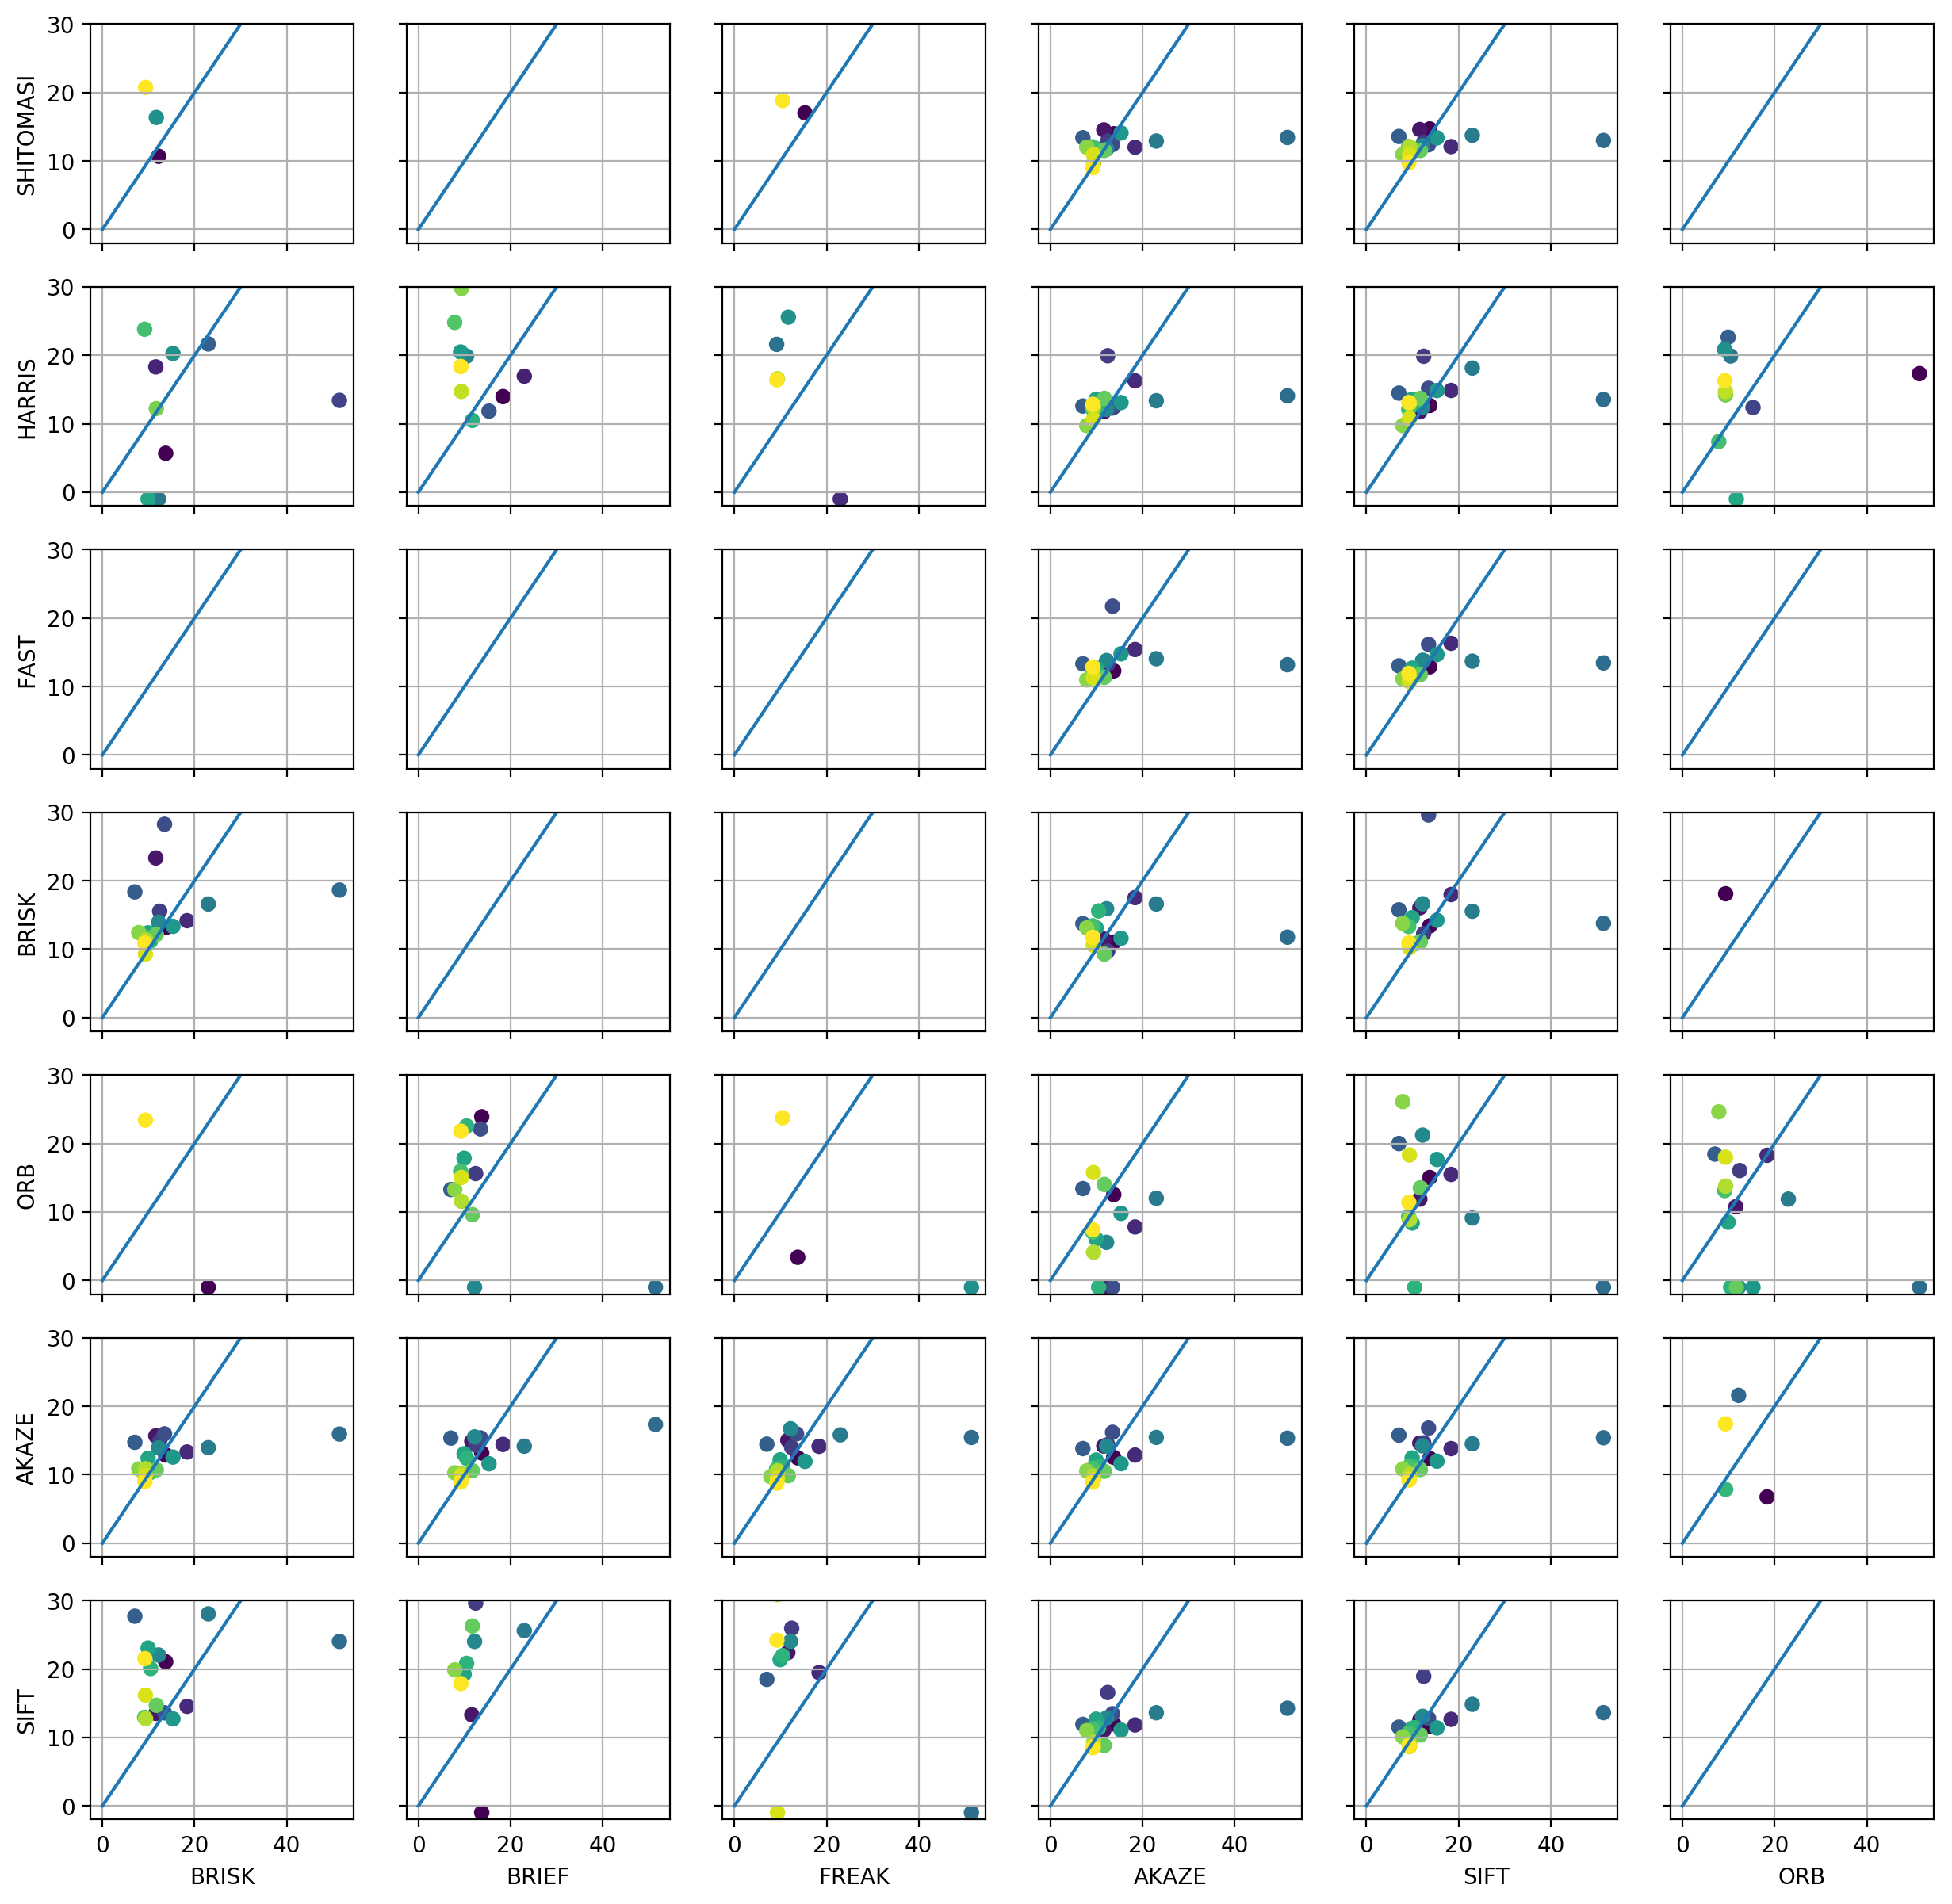

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
# plt.rcParams['figure.dpi'] = 200
fig, axs = plt.subplots(len(detectors), len(descriptors), sharex= True, sharey=True)
for d, det in enumerate(detectors):
    for dd, desc in enumerate(descriptors):
        this_df = data[(data['detector']==det) & (data['descriptor']==desc)]
        axs[d,dd].scatter(this_df['lidar_ttc'], this_df['image_ttc'], c=list(range(len(this_df))))
        if d==len(detectors)-1:
            axs[d,dd].set(xlabel=desc)
        if dd==0:
            axs[d,dd].set(ylabel=det)
        axs[d, dd].set_ylim([-2, 30])
        axs[d, dd].grid()
        axs[d,dd].plot([0,50], [0,50])
        

plt.show()

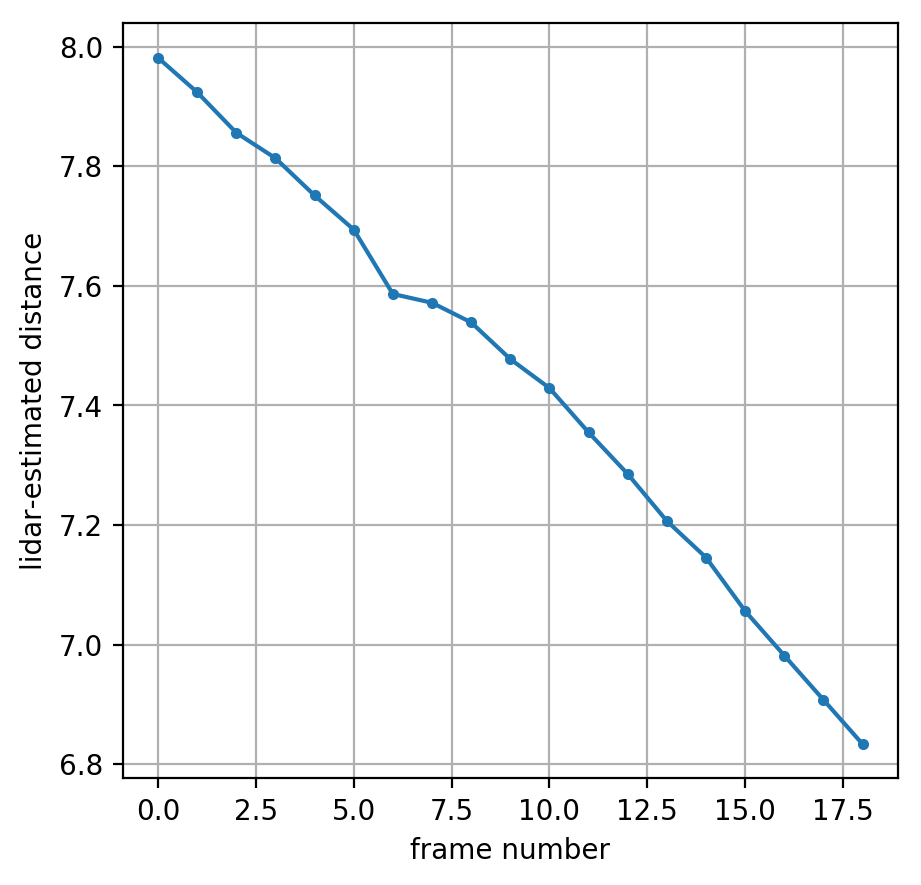

In [24]:
dist_data = pd.read_csv("ttc_stats_2.csv")

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(dist_data['lidar_distance'], marker='.')
plt.xlabel('frame number')
plt.ylabel('lidar-estimated distance')
plt.grid()
plt.show()